This notebook implements a basic perceptron in using Python and popular libraries. It implements the boolean function A AND !B.

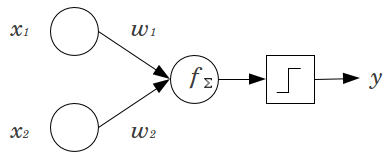

The input will be visualized on a 2D plot, so the variables A and B take on the form of coordinates (A, B). Once the model is trained, we can visualize how it linearly separates the data by plotting it on a 2D graph.

To decide which logical operation to implement, change the values in the X column to match the output of your desired boolean function. For A AND !B, this is the truth table:

\begin{array}{l|c|r}
    A & B & X \\
    \hline
    1 & 1 & 0 \\
    1 & 0 & 1 \\
    0 & 1 & 0 \\
    0 & 0 & 0
\end{array}

In [ ]:
import pandas
from random import random

truthtable = pandas.DataFrame({'A':[0,0,1,1],
                               'B':[0,1,0,1],
                               'X':[0,0,1,0]})

We start of with random weights and decide to train for 50 iterations (since this is a simple scenario). The learning rate, $ η $ (pronounced eta), it set to 0.1.

For each training cycle, we will update the weights to bring them closer to values that will correctly separate the data using this equation:
$$
w_{i} = w_{i} + \eta(t-o)x_{i}
$$
where

* $ w_{i} $ is the current weight
* $ \eta $ is the learning rate
* $ t $ is the target output (given by $ X_{i} $)
* $ o $ is the perceptron output (given by $ (A_{i} * w_{0} + B_{i} * w_{1}) > \frac{1}{2} $)

Finally, we keep track of the average error ($ t - o $) of each iteration so we can visualize how our perceptron learns once we're done.

In [ ]:
#@title Training
w = [0.25, -0.75]   # starting weights
iters = 50          # training iterations
eta = 0.1           # learning rate
error = []          # list of errors for a graph of how it learns

for x in range(iters):
    sum = 0
    for i in range(4):
        d = truthtable.X[i] - (truthtable.A[i] * w[0] + truthtable.B[i] * w[1]) > 0.5
        sum += d

        w[0] += eta * (d) * truthtable.A[i]         # update weight 1
        w[1] += eta * (d) * truthtable.B[i]         # update weight 2
        
    error.append(sum/4)     # save the average error

Now, we will generate 100 numbers from 0 to 1 twice and turn that into a grid. Then we will run those numbers through our perceptron, store it in the distances list, and plot it. 

<function matplotlib.pyplot.show(*args, **kw)>

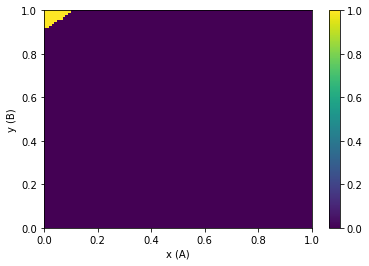

In [ ]:
#@title Heatmap
from itertools import product
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(0,1,100) # generate 100 values between 0 and 1
y = numpy.linspace(0,1,100)
grid = list(product(x,y))   # generates coordinates over a 2D grid

distances = list()
for val in grid:
    distances.append((w[0]*val[0] + w[1]*val[1]) > 0.5)   

distMatrix = numpy.reshape(distances, (100,100)) # reshapes from list to 2D grid
heatmap = plt.pcolormesh(x, y, distMatrix)
plt.colorbar(heatmap)
plt.xlabel("x (A)")
plt.ylabel("y (B)")
plt.show

The second plot shows how our preceptron learned over the iterations. Since this is a simple distribution, it doesn't take make iterations to find weights that correctly separate the distribution.

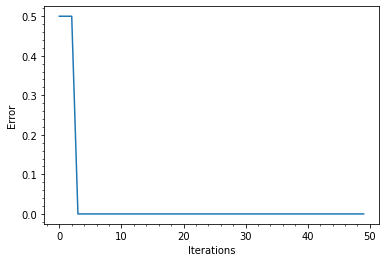

In [ ]:
x = range(0, iters)
plt.plot(x, error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.minorticks_on()
plt.show()